# **This file performs below operations** -


***s2: ER Modeling - timeframe (2019-2022)***
```
1. Draw Correlation Analysis plot
2. Plot some of the raw data variables
3. Draw histogram to check the skewness in the data
4. Draw Scatter plots.

```





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import walk
from time import sleep
from tqdm import tqdm
import pickle
import string
import numpy as np
import pandas as pd
from scipy import stats
from scipy import interpolate
import plotly.express as px
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gopi_base_path = '/content/drive/MyDrive/Colab Notebooks/DISC OU/DS for Ag - Alfalfa/Fall 2023'
Adam_base_path = '/content/drive/MyDrive/DSA Project'

raj_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
base_path = raj_path # just change this line
s1_data_path = os.path.join(base_path, 'Data','EVI and LSWI')
s2_data_path = os.path.join(base_path, 'Data','ER')

## Loading the 2nd dataset

In [ ]:
main_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
data_path = os.path.join(main_path, 'Data')
code_path = os.path.join(main_path, 'Code')

In [ ]:
pickle_dir = os.path.join(data_path, 'pickle files')
# save the combined alfalfa data to a pickle file
pickle_dir = os.path.join(data_path, 'pickle files')
if os.path.exists(pickle_dir) == False:
  os.mkdir(pickle_dir)

In [ ]:
# Reading pickle file.
pickle_dir = os.path.join(data_path, 'pickle files')
file_name = 'p20_final_df_filtered.pkl'
file_path = os.path.join(pickle_dir, file_name)
with open(file_path, 'rb') as fp:
    p20_final_df_filtered = pickle.load(fp)

print(p20_final_df_filtered.head())

                      Rg  Tair  Tsoil     rH   VPD  Ustar       SWC      GPP  \
Date                                                                           
2019-04-01 00:30:00  0.0  2.57   9.73  73.91  0.09   0.05  0.306482  0.55305   
2019-04-01 01:00:00  0.0  2.56   9.39  73.33  0.09   0.03  0.306471  0.55226   
2019-04-01 01:30:00  0.0  1.88   9.12  76.41  0.09   0.02  0.306262  0.49811   
2019-04-01 02:00:00  0.0  1.78   8.83  74.55  0.09   0.03  0.306530  0.49012   
2019-04-01 02:30:00  0.0  1.84   8.57  68.79  0.09   0.03  0.305710  0.49492   

                      NEE        ET       ER  
Date                                          
2019-04-01 00:30:00  0.61  0.000358  1.16305  
2019-04-01 01:00:00  0.29  0.000329  0.84226  
2019-04-01 01:30:00  1.35  0.000964  1.84811  
2019-04-01 02:00:00  0.63  0.000467  1.12012  
2019-04-01 02:30:00  0.76  0.000832  1.25492  


In [ ]:
p20_final_df_filtered

,Rg,Tair,Tsoil,rH,VPD,Ustar,SWC,GPP,NEE,ET,ER
Date,,,,,,,,,,,
2019-04-01 00:30:00,0.00,2.57,9.73,73.91,0.09,0.05,0.306482,0.55305,0.61,0.000358,1.16305
2019-04-01 01:00:00,0.00,2.56,9.39,73.33,0.09,0.03,0.306471,0.55226,0.29,0.000329,0.84226
2019-04-01 01:30:00,0.00,1.88,9.12,76.41,0.09,0.02,0.306262,0.49811,1.35,0.000964,1.84811
2019-04-01 02:00:00,0.00,1.78,8.83,74.55,0.09,0.03,0.306530,0.49012,0.63,0.000467,1.12012
2019-04-01 02:30:00,0.00,1.84,8.57,68.79,0.09,0.03,0.305710,0.49492,0.76,0.000832,1.25492
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,19.41,11.24,6.75,64.57,0.89,0.13,0.283907,0.00000,3.78,-0.002453,3.78000
2022-12-31 19:30:00,0.00,7.50,6.58,75.85,0.00,0.07,0.284217,0.00000,1.59,0.000767,1.59000
2022-12-31 20:30:00,0.00,7.97,6.41,71.28,1.41,0.10,0.284302,0.00000,1.69,0.001927,1.69000


In [ ]:
if (p20_final_df_filtered['Rg'] == -9999).any():
    print("Column 'Rg' contains at least one -9999 value.")
else:
    print("Column 'Rg' does not contain any -9999 values.")

Column 'Rg' does not contain any -9999 values.


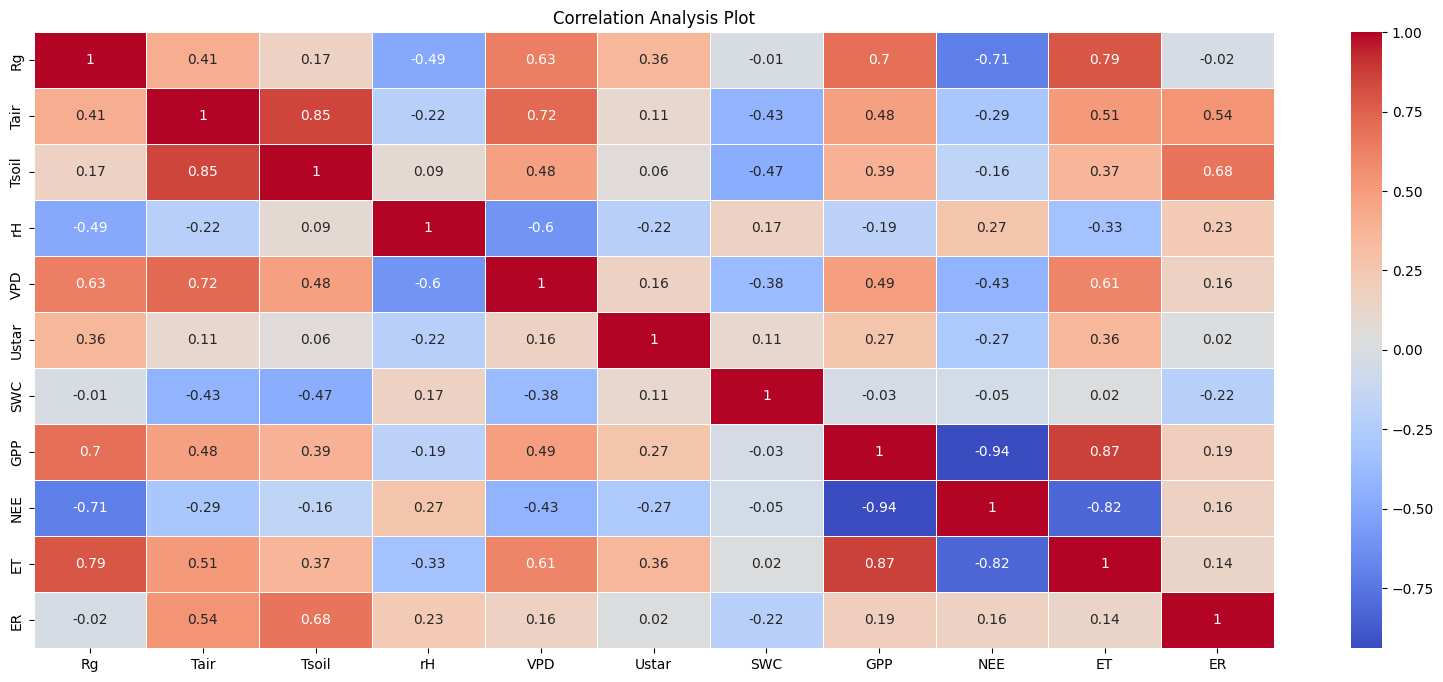

In [ ]:
# Correlation Analysis:
corr_matrix = p20_final_df_filtered.corr().round(2)
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis Plot')
plt.show()

In [ ]:
p20_final_df_ind_imputed_1 = p20_final_df_filtered.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on your data and transform it
normalized_p20_final_df_ind_imputed_1 = scaler.fit_transform(p20_final_df_ind_imputed_1)

# Convert the result back to a DataFrame
normalized_df = pd.DataFrame(normalized_p20_final_df_ind_imputed_1, columns=p20_final_df_ind_imputed_1.columns)

In [ ]:
normalized_df = normalized_df.set_index(p20_final_df_filtered.index)

In [ ]:
# Create the line chart
fig = px.line(normalized_df, x=normalized_df.index, y=['ER'])

# Update the layout to set the background colors
fig.update_layout(
    title={
        'text': "ER over time",
        'x':0.5
    },
    plot_bgcolor='black',  # Set the background color of the plot area
    paper_bgcolor='lightgray'  # Set the background color of the entire plot
)

# Display the chart
fig.show()

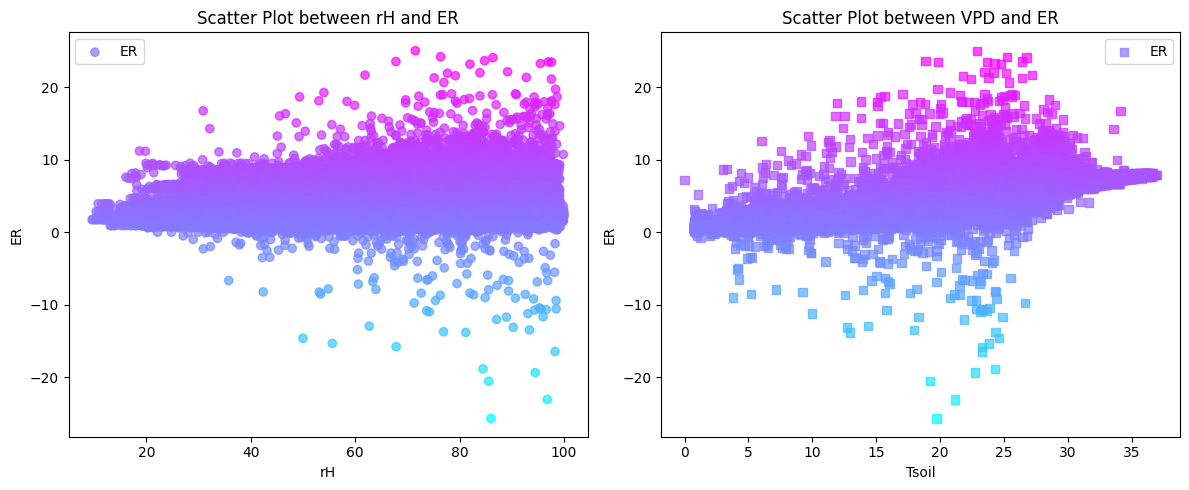

In [ ]:
# Set a custom color palette from seaborn
sns.set_palette("cool")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot 1:rH vs ER
axes[0].scatter(
    p20_final_df_filtered['rH'],
    p20_final_df_filtered['ER'],
    c=p20_final_df_filtered['ER'],  # Color the markers by ER values
    cmap='cool',  # Use the 'cool' colormap
    marker='o',  # Marker style (circle)
    alpha=0.7,  # Transparency
    label='ER'  # Legend label
)
axes[0].set_xlabel("rH")
axes[0].set_ylabel("ER")
axes[0].set_title("Scatter Plot between rH and ER")
axes[0].legend()  # Show legend

# Scatter plot 2: VPD vs ER
axes[1].scatter(
    p20_final_df_filtered['Tsoil'],
    p20_final_df_filtered['ER'],
    c=p20_final_df_filtered['ER'],  # Color the markers by ER values
    cmap='cool',  # Use the 'cool' colormap
    marker='s',  # Marker style (square)
    alpha=0.7,  # Transparency
    label='ER'  # Legend label
)
axes[1].set_xlabel("Tsoil")
axes[1].set_ylabel("ER")
axes[1].set_title("Scatter Plot between VPD and ER")
axes[1].legend()  # Show legend

# Adjust spacing between subplots
plt.tight_layout()



# Show the plots
plt.show()

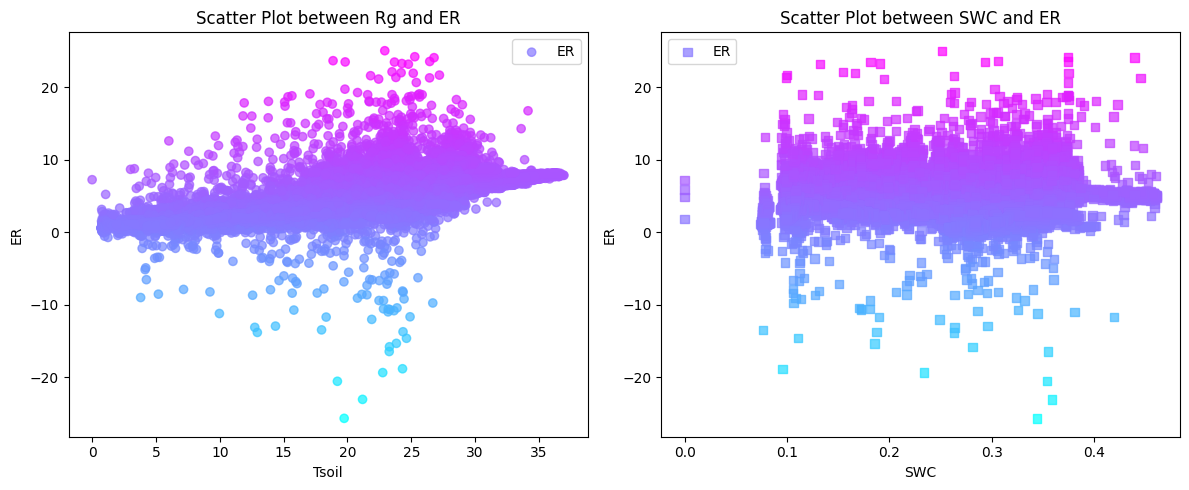

In [ ]:
# Set a custom color palette from seaborn
sns.set_palette("cool")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot 1:Tsoil vs ER
axes[0].scatter(
    p20_final_df_filtered['Tsoil'],
    p20_final_df_filtered['ER'],
    c=p20_final_df_filtered['ER'],  # Color the markers by ER values
    cmap='cool',  # Use the 'cool' colormap
    marker='o',  # Marker style (circle)
    alpha=0.7,  # Transparency
    label='ER'  # Legend label
)
axes[0].set_xlabel("Tsoil")
axes[0].set_ylabel("ER")
axes[0].set_title("Scatter Plot between Rg and ER")
axes[0].legend()  # Show legend

# Scatter plot 2: SWC vs ER
axes[1].scatter(
    p20_final_df_filtered['SWC'],
    p20_final_df_filtered['ER'],
    c=p20_final_df_filtered['ER'],  # Color the markers by ER values
    cmap='cool',  # Use the 'cool' colormap
    marker='s',  # Marker style (square)
    alpha=0.7,  # Transparency
    label='ER'  # Legend label
)
axes[1].set_xlabel("SWC")
axes[1].set_ylabel("ER")
axes[1].set_title("Scatter Plot between SWC and ER")
axes[1].legend()  # Show legend

# Adjust spacing between subplots
plt.tight_layout()



# Show the plots
plt.show()

In [ ]:
p20_final_df_filtered_10 = p20_final_df_filtered.iloc[:,:10]

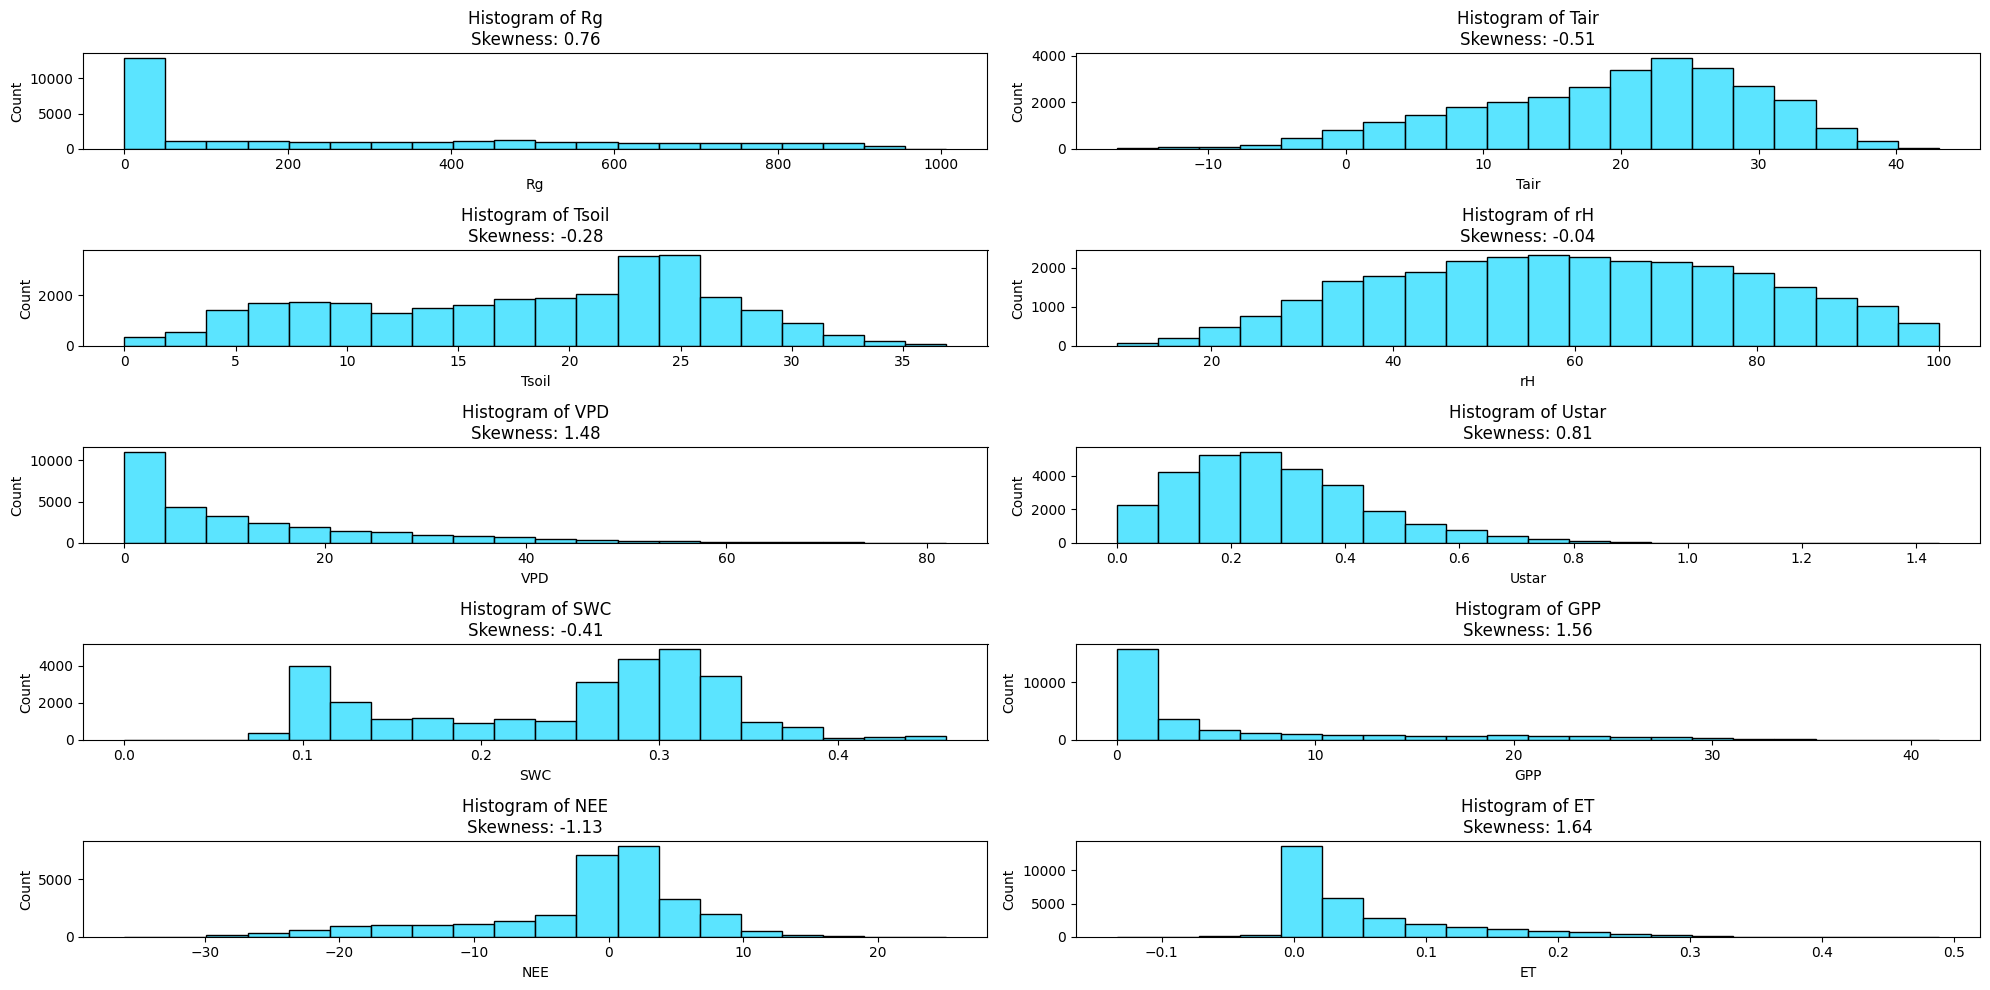

In [ ]:
import seaborn as sns

# Get the list of columns from your DataFrame
columns = p20_final_df_filtered_10.columns

# Calculate the number of rows for the subplots
num_rows = 5  # Set the number of rows you want

# Calculate the number of columns required to accommodate all the subplots
num_cols = (len(columns) + num_rows - 1) // num_rows  # Use ceiling division

# Set up subplots to display histograms for each column with a smaller figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))  # Adjust the figsize to make it smaller

# Loop through each column and create a histogram
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=p20_final_df_filtered_10, x=column, ax=ax, bins=20)  # You can adjust the number of bins as needed
    skewness = p20_final_df_filtered_10[column].skew()  # Calculate skewness
    ax.set_title(f'Histogram of {column}\nSkewness: {skewness:.2f}')

# Remove any empty subplots
for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
main_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
data_path = os.path.join(main_path, 'Data')
code_path = os.path.join(main_path, 'Code')

In [ ]:
pickle_dir = os.path.join(data_path, 'pickle files')
# save the combined alfalfa data to a pickle file
pickle_dir = os.path.join(data_path, 'pickle files')
if os.path.exists(pickle_dir) == False:
  os.mkdir(pickle_dir)

In [ ]:
file_name = 'p20_final_df_filtered_viz.pkl'
file_path = os.path.join(pickle_dir, file_name)
# save/dump to pickle
with open(file_path, 'wb') as handle:
    pickle.dump(p20_final_df_filtered, handle, protocol=pickle.HIGHEST_PROTOCOL)